# Partie 3: modéliser

Lino Galiana  
2025-10-06

> **Compétences à l’issue de ce chapitre**
>
> -   Situer la modélisation au cœur de la statistique et du machine learning, et comprendre son rôle dans l’approche inferentielle (au-delà de la simple description) ;
> -   Identifier les différences conceptuelles entre apprentissage supervisé, non supervisé, classification, régression et deep learning ;
> -   Reconnaître les limites des modèles complexes (comme les grands réseaux de neurones) en termes de besoins en données et en ressources, et savoir quand privilégier des méthodes plus simples ;
> -   Apprécier l’intérêt des algorithmes simples et classiques (SVM, régression, clustering, arbres, forêts aléatoires) facilement utilisables via Scikit-Learn pour démarrer une démarche de machine learning ;

# 1. Introduction

Les *data scientists* sont souvent associés à la mise en oeuvre
de modèles complexes d’intelligence artificielle.
Le succès médiatique de ce type d’outils, notamment `ChatGPT`,
n’y est pas pour rien. Cependant, la modélisation n’est souvent
qu’une
phase du travail du *data scientist*, un peu comme la visualisation.
D’ailleurs, dans certaines organisations où la division des tâches
est plus poussée, les *data engineers* sont au moins aussi
impliqués dans la phase de modélisation que les *data scientists*.

C’est souvent un péché de jeunesse de penser qu’on peut résumer
le travail du *data scientist* exclusivement à la phase de modélisation.
Cette dernière dépend très fortement de la qualité du travail de
nettoyage et structuration des données mis en oeuvre en amont. La
mise en oeuvre de modèles complexes, qui s’accommodent de données
peu structurées, est gourmande en ressources et coûteuse. Ce ne sont
donc qu’un nombre limité d’acteurs qui peuvent entraîner, *ex nihilo*,
des grands modèles de langage[1], capables de dépenser au moins 300 000 dollars
dans l’entraînement d’un modèle, avant même toute phase d’inférence (Izsak, Berchansky, et Levy 2021).
Ces besoins computationnels pour entraîner de grands modèles de langage sont
d’ailleurs assez gourmands en énergie, ce qui peut amener à
des empreintes carbones non négligeables (Strubell, Ganesh, et McCallum 2019; Arcep 2019).

Heureusement, il est possible de mettre en oeuvre des modélisations plus
légères, celles que nous présenterons dans les prochains chapitres.
Cette partie du cours se concentrera principalement sur la présentation
d’algorithmes de *machine learning* (apprentissage automatique en Français). On peut définir
ce terme de manière large comme un ensemble de techniques
permettant, à partir d’un ensemble d’observations, à des algorithmes de dégager des structures ou
régularités statistiques sans que celles-ci aient été définies *a priori* par les modélisateurs.
Cette définition permet de distinguer cette approche d’autres champs de l’intelligence artificielle,
notamment les IA symboliques, où chaque observation est caractérisée à partir d’un ensemble de règles exhaustives et prédéfinies.
Bien que cette définition large permette d’englober la statistique inférentielle traditionnelle, elle permet néanmoins de comprendre la différence philosophique majeure entre l’approche par apprentissage automatique et l’économétrie comme nous allons pouvoir l’évoquer par la suite.

> **Comment définir l’intelligence artificielle ?**
>
> 👈️ **Intelligence artificielle**
>
> Russell et Norvig (2020) définissent l’intelligence artificielle de la manière suivante:
>
> > « L’étude des agents \[intelligents\] qui reçoivent des perceptions de l’environnement et agissent. Chacun de ces agents est mis en œuvre par une fonction qui associe les perceptions aux actions, et nous couvrons différentes manières de de représenter ces fonctions, telles que les systèmes de production, les agents réactifs, les planificateurs logiques, les réseaux de neurones et les systèmes de gestion de l’information et les systèmes de théorie de la décision »
>
> Cette définition très large permet d’inclure beaucoup d’approches différentes dans le champ de l’intelligence artificielle. Elle définit l’intelligence artificielle comme une règle de décision, très générique, issues de données. Pour formaliser mathématiquement, il s’agit de relier des perceptions $\mathbb{X}$, c’est-à-dire des faits pris comme donnés, à une décision $y$ grâce à une règle de décision $f$ : $y=f(\mathbb{X})$ (la décision $y$ est issue d’un ensemble de décisions, de taille restreinte ou large selon le phénomène noté $\mathcal{Y}$). La manière dont est construite cette fonction $f$ distinguera différents champs de l’intelligence artificielle.
>
> L’*AI Act* européen de 2024 propose une [définition assez similaire](https://artificialintelligenceact.eu/fr/article/3/) bien qu’elle soit exprimée dans des termes différents:
>
> > « Système basé sur une machine qui est conçu pour fonctionner avec différents niveaux d’autonomie et qui peut faire preuve d’adaptabilité après son déploiement, et qui, pour des objectifs explicites ou implicites, déduit, à partir des données qu’il reçoit, comment générer des résultats tels que des prédictions, du contenu, des recommandations ou des décisions qui peuvent influencer des environnements physiques ou virtuels »
>
> Dans le cadre de ce cours, nous n’allons parler que des approches constuites autour de l’apprentissage, c’est-à-dire les approches qui visent à induire des lois, forcément incertaines, à partir d’un ensemble de données. Cette approche est très différente des [IA symboliques](https://fr.wikipedia.org/wiki/Intelligence_artificielle_symbolique) qui offrent une autonomie limitée à la machine puisque son comportement est cadré par un ensemble, parfois large, de règles déterministes.

Le choix de se concentrer sur des algorithmes simples de *machine learning* dans la partie modélisation
plutôt que d’aller directement aux réseaux de neurone, permet d’abord de
présenter la démarche scientifique liée à l’apprentissage, notamment pour obtenir des performances satisfaisantes lorsqu’on extrapole sur des données non rencontrées lors de la phase d’apprentissage.
Cela permet également de souligner des enjeux qui seront également valables pour des modèles plus complexes, par exemple la préparation des données permettant de réduire le bruit dans les données afin que les modèles puissent dégager des structures plus fiables dans les données.
En fait, pour être plus pertinent que des approches plus parcimonieuses,
les techniques de *deep learning*, notamment
les réseaux de neurones, nécessitent soit des volumes de données très
importants (des millions voire dizaine de millions d’observations) soit
des données à la structure complexe comme le langage naturel ou les images.
Dans de nombreux cas, des modèles plus simples comme les techniques d’apprentissage
automatique (*machine learning*) suffisent largement.

# 2. La modélisation, une approche au coeur de la statistique

Un modèle statistique
est une représentation simplifiée et structurée d’un phénomène réel,
construite à partir d’observations issues d’un ensemble partiel de données.

👈️ **Modèle statistique**

Un modèle vise à capturer les relations et les structures sous-jacentes au sein de ces données, permettant ainsi de formuler des hypothèses, d’effectuer des prédictions et d’extrapoler des conclusions au-delà
de l’ensemble de données mesurées.
Les modèles statistiques fournissent ainsi un cadre analytique pour explorer, comprendre et interpréter les informations contenues dans les données.

Représenter la réalité sous la forme d’un modèle est un principe à la
base de la statistique comme discipline scientifique et ayant des
applications dans de nombreux champs disciplinaires : économie,
sociologie, géographique, biologie, physique, etc.
Selon les disciplines, le nom donné peut varier mais on retrouve
régulièrement la même approche scientifique : le modélisateur
construit des relations entre plusieurs variables théoriques
ayant des contreparties empiriques afin de quantifier la relation entre celles-ci.

Cette approche est au coeur de la **statistique inférentielle**, par opposition à la **statistique descriptive**.
Dans les deux cas, l’objectif est d’utiliser un **échantillon**, c’est-à-dire un ensemble réduit de données observées,
pour mieux connaître une **population**, l’ensemble de données concernées par une étude. La différence entre les deux approches est liée à la manière dont cette extrapolation est faite. Dans le cadre de la statistique inférentielle, on tend plutôt à inférer des lois générales, avec des marges d’incertitude statistique, à partir des données observées, que ce soit sur la distribution statistique d’une variable (statistique univariée) ou sur les relations entre plusieurs. La statistique descriptive se contente, quant à elle, de synthétiser l’information dans un jeu de données, souvent par le biais de moments de la distribution (moyenne, quantiles, etc.) sans prétention à fournir une explication générale sur le processus générateur de données.

👈️ **Statistique inférentielle**, **statistique descriptive**, **échantillon**, **population**

Ces deux approches ne sont pas inconciliables, au contraire elles sont complémentaires. Se lancer dans une approche inférentielle sans avoir mené une approche descriptive approfondie amènera souvent la première vers des impasses ou des conclusions peu fiables. L’approche inférentielle peut également nourrir une analyse descriptive approfondie en permettant de hiérarchiser l’information présente dans un jeu de données et ainsi guider le travail descriptif en permettant celui-ci de se concentrer sur les faits saillants.

Dans le domaine de la recherche économique, les modèles empiriques servent généralement à associer certains paramètres structurants des modèles de comportements économiques à des valeurs quantitatives.
Les modèles statistiques, comme les modèles économiques,
présentent néanmoins toujours une part d’irréalisme (Friedman 1953; Salmon 2010)
et accepter de manière trop littérale les implications d’un modèle, même s’il
a de bonnes performances prédictives, peut être dangereux et relever d’un biais
scientiste. On sélectionne plutôt le moins mauvais modèle
que le vrai processus générateur des données.

Dans l’enseignement de l’ENSAE la modélisation empirique se retrouve
principalement dans deux domaines d’application : le *machine learning* et
l’économétrie. La différence est certes
sémantique - la régression linéaire peut être considérée comme une
technique de *machine learning* ou d’économétrie - mais elle est
également conceptuelle :

-   Dans le domaine du *machine learning*,
    la structure imposée par le modélisateur est minimale et ce sont plutôt
    les algorithmes qui, sur des critères de performance statistique, vont
    amener à choisir une loi mathématique qui correspond au mieux aux données ;
-   En économétrie,
    les hypothèses de structure des lois sont plus fortes (même dans un cadre semi ou non-paramétrique) et sont plus souvent imposées
    par le modélisateur.

Dans cette partie du cours, nous allons principalement
parler de *machine learning* car il s’agit d’une perspective
plus opérationnelle que l’économétrie qui est plus directement associée
à des concepts statistiques complexes comme la théorie asymptotique.

L’adoption du *machine learning* dans la littérature économique a été longue
car la structuration des données est souvent le
pendant empirique d’hypothèses théoriques sur le comportement des acteurs ou des marchés (Athey et Imbens 2019; Charpentier, Flachaire, et Ly 2018).
Pour caricaturer, l’économétrie s’attacherait à comprendre la causalité de certaines variables sur une autre.
Cela implique que ce qui intéresse l’économètre
est principalement de l’estimation des paramètres (et l’incertitude
sur l’estimation de ceux-ci) qui permettent de quantifier l’effet d’une
variation d’une variable sur une autre.
Toujours pour caricaturer,
le *machine learning* se focaliserait
sur un simple objectif prédictif en exploitant les relations de corrélations entre les variables.
Dans cette perspective, l’important n’est pas la causalité mais le fait qu’une variation
de $x$% d’une variable permette d’anticiper un changement de $\beta x$ de la variable
d’intérêt ; peu importe la raison.
Mullainathan et Spiess (2017) ont ainsi, pour simplifier, proposé la différence fondamentale qui
suit : l’économétrie se préoccupe de $\widehat{\beta}$ là où le *machine learning*
se focalise sur $\widehat{y}$. Les deux sont bien sûr reliés dans un cadre
linéaire mais cette différence d’approche a des implications importantes
sur la structure des modèles étudiés, notamment leur parcimonie[2].

# 3. Quelques définitions

Dans cette partie du cours nous allons employer un certain nombre
de termes devenus familiers aux praticiens du *machine learning*
mais qui méritent d’être explicités pour comprendre les prochains chapitres.

## 3.1 Entraînement et inférence

Le *machine learning* est une approche opérationnelle: l’objectif est généralement
d’estimer des relations entre variables observées pour avoir une règle de décision puis extrapoler celle-ci sur
un autre échantillon de données. Les deux prochains chapitres visent à présenter la démarche scientifique pour avoir une extrapolation de qualité.

L’entraînement (ou apprentissage) est la phase du travail où un modèle de *machine learning* affine des relations à partir d’un ensemble de données. Pour faire l’analogie avec l’apprentissage humain, il s’agit de la phase où le machine learning va réviser ses cours avant le contrôle.

👈️ **Apprentissage, entraînement**

L’inférence est la phase où la règle de décision est mise en oeuvre sur de nouvelles données, qui n’ont pas été vues lors de l’entraînement. Pour reprendre l’analogie précédente, il peut s’agir de nouvelles questions lors du contrôle (phase d’évaluation) ou de l’application au monde réel des connaissances acquises lors de l’apprentissage.

👈️ **Inférence**

## 3.2 *Machine learning* et *deep learning*

Jusqu’à présent nous avons beaucoup utilisé, sans le définir, le
concept de *machine learning*, dont la traduction française est
apprentissage automatique mais le terme anglo-saxon est suffisamment
utilisé pour être considéré comme standard.

Le *machine learning* est un ensemble de techniques algorithmiques
qui permettent aux ordinateurs d’apprendre, à partir d’exemples, à ajuster un modèle
sans avoir explicitement défini celui-ci. A partir d’algorithmes itératifs et d’une
métrique de performance, des règles de classification ou de prédiction vont permettre
de mettre en relation des caractéristiques (*features*) avec une variable d’intérêt (*label*)[3].

👈️ ***Machine learning*, label, *features***

De nombreux algorithmes existent et se distinguent sur la manière d’introduire une structure plus ou
moins formelle dans la relation entre les variables observées. Nous n’allons voir que quelques-uns
de ces algorithmes : *support vector machine* (SVM), régression logistique, arbres de décision, forêts
aléatoires, etc. Simples à mettre en oeuvre grâce à la librairie `Scikit-Learn`, ils permettront
déjà de comprendre la démarche originale du *machine learning* que vous pourrez approfondir
ultérieurement.

Au sein de la grande famille des algorithmes de *machine learning*, tendent de plus à plus à devenir
autonomes les techniques de réseaux de neurone. Les techniques qui s’appuient sur les réseaux de neurones sont regroupées
dans une famille qu’on
appelle *deep learning* (apprentissage profond en Français).
Ces réseaux sont inspirés du fonctionnement du cerveau humain et sont composés de nombreuses couches de neurones interconnectés.
La structure canonique bien connue est illustrée dans la **?@fig-nn**.
Le *deep learning* est intéressant pour créer des modèles capables d’apprendre de représentations
de données complexes et abstraites à partir de données brutes,
ce qui évite parfois la complexe tâche de définir manuellement des caractéristiques spécifiques à cibler.
Les champs de l’analyse d’image (*computer vision*) ou du traitement du langage naturel sont les principaux
cas d’application de ces méthodes.

👈️ ***Deep learning*, réseaux de neurone**

> **Exemple de structure simplifiée d’un réseau de neurones.**
>
> 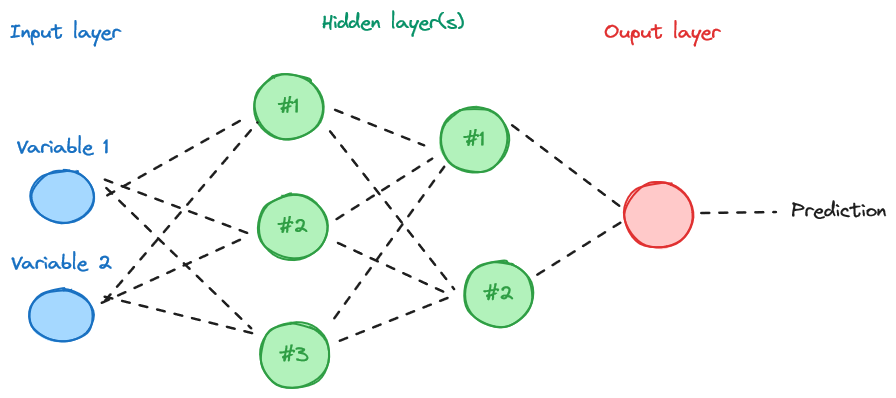
>
> La première couche (*input layer*) correspond aux variables introduites dans le modèle. La combinaison de celles-ci se fait dans des couches intermédiaires (*hidden layer*). Le passage entre deux couches se fait par le biais d’une fonction d’activation, par exemple une fonction *[sigmoid](https://fr.wikipedia.org/wiki/Sigmo%C3%AFde_(math%C3%A9matiques))*, construite à partir d’une moyenne pondérée (dont les poids seront ajustés lors de l’entraînement) des couches précédentes. La complexité du réseau mis en oeuvre ainsi que des relations entre les couches détermine le type de réseau mis en oeuvre (*feed forward network*, *convolutional network*, etc.).
>
> Les réseaux de neurone sont des modèles à la structure complexe. Sur des données volumineuses et complexes, ils peuvent être lourds, voire impossible à entraîner sur des machines classiques. Si les données qu’on possède correspondent à celles attendues par le modèle, il est tout à fait possible d’utiliser celui-ci pour l’inférence sans le ré-entraîner ou en mettant en oeuvre un apprentissage à la marge, dit [fine tuning](https://www.cnil.fr/fr/definition/ajustement-fine-tuning). Pour reprendre l’analogie avec l’apprentissage humain, le *fine tuning* ressemble à la manière dont on va mettre à jour ses connaissances avec un nouveau cours avant un contrôle. Il n’est pas nécessaire de tout réapprendre, seulement de peaufiner ses connaissances avec les nouveautés du cours.
>
> 👈️ ***Fine tuning***
>
> De nombreux modèles sont mis à disposition sur `HuggingFace`, la
> plateforme de partage de modèles de *deep learning* (le `Github` du *deep learning* en quelques sortes). `HuggingFace` propose
> propose aussi des cours sur le sujet, notamment sur le [traitement du langage naturel (NLP)](https://huggingface.co/learn/nlp-course/chapter1/2?fw=pt). Nous ferons du traitement du langage naturel dans la [prochaine partie](../../content/NLP/index.qmd) de ce cours mais
> de manière plus modeste en revenant sur les concepts nécessaires avant de mettre en oeuvre
> une modélisation sophistiquée du langage.

Nous n’allons pas vraiment parler dans cette partie du cours de *deep learning* car ces modèles, pour être pertinents, nécessitent
soit des données structurées d’un volume important, ce qui est rarement disponible
en *open data*, et pour lesquelles les relations entre variables sont complexes, soit
des données non structurées telles que des données textuelles, des images, des vidéos, etc. Les données textuelles sont l’objet de la prochaine partie du cours car elles font appel à des concepts spécifiques, qui nécessitent déjà la compréhension des enjeux de la modélisation sur données structurées.

## 3.3 Apprentissage supervisé ou non supervisé

Une ligne de clivage importante entre les méthodes à mettre en oeuvre est le fait d’observer ou non
le *label* (la variable $y$) qu’on désire modéliser.

Prenons par exemple un site de commerce qui dispose
d’informations sur ses clients comme l’âge, le sexe, le lieu de résidence.
Ce site peut désirer
exploiter cette information de différentes manières pour modéliser le comportement d’achat.

En premier lieu, ce site peut désirer
anticiper le volume d’achat d’un nouveau client ayant certaines caractéristiques.
Dans ce cas, il est possible d’utiliser les montants dépensés par d’autres clients en fonction de leurs
caractéristiques. L’information pour notre nouveau client n’est pas mesurée mais elle peut s’appuyer
sur un ensemble d’observations de la même variable.

Mais il est tout à fait possible d’entraîner un modèle sur un *label* qu’on ne mesure pas, en supposant
qu’il fasse sens. Par exemple notre site de commerce peut désirer déterminer, en fonction des
caractéristiques de notre nouveau client et de sa clientèle existante, s’il appartient à tel ou
tel groupe de consommateurs : les dépensiers, les économes… Bien sûr on ne sait jamais *a priori*
à quel groupe appartient un consommateur mais le rapprochement entre consommateurs ayant un comportement
similaire permettra de donner du sens à cette catégorie. Dans ce cas, l’algorithme apprendra à reconnaître
quelles caractéristiques sont structurantes dans la constitution de groupes au comportement similaire et
permettra d’associer tout nouveau consommateur à un groupe.

Ces deux exemples illustrent l’approche différente selon qu’on essaie de construire des modèles
sur un *label* observé ou non. Cela constitue même l’une des dualités fondamentales dans les
techniques de *machine learning* :

👈️ **Apprentissage supervisé, apprentissage non supervisé**

-   **Apprentissage supervisé** : la valeur cible est connue et peut être utilisée pour évaluer la qualité d’un modèle ;
-   **Apprentissage non supervisé** : la valeur cible est inconnue et ce sont des critères statistiques qui vont amener
    à sélectionner la structure de données la plus plausible.

Cette partie du cours illustrera ces deux approches de manière différente à partir du même
jeu de données, les résultats des élections américaines.
Dans le cas de l’apprentissage supervisé, nous chercherons à modéliser directement
le résultat des candidats aux élections (soit le score, soit le gagnant). Dans
le cas de l’apprentissage non supervisé, nous essaierons de regrouper les
territoires au comportement de vote similaire en fonction de facteurs
socio-démographiques.

## 3.4 Classification et régression

Une deuxième dualité fondamentale qui est déterminante dans le choix de la méthode de *machine learning*
à mettre en oeuvre est la nature du *label*. S’agit-il d’une variable continue ou d’une variable
discrète, c’est-à-dire prenant un nombre limité de modalités ?

Cette différence de nature entre les données amène à distinguer deux types d’approche :

👈️ **Classification, régression**

-   Dans les problématiques de **classification**, où notre label $y$ a un nombre fini de valeurs[4],
    on cherche à prédire dans quelle classe ou à quel groupe il est possible de rattacher nos données.
    Par exemple, si vous prenez du café le matin, faites-vous partie du groupe des personnes ronchons au lever ?
    Les métriques de performance utilisent généralement la proportion de bonnes ou mauvaises classifications
    pour estimer la qualité d’un modèle.
-   Dans les problématiques de **régression**, où notre label est une grandeur numérique, on
    cherche à prédire directement la valeur de notre variable dans le modèle. Par exemple, si vous
    avez tel ou tel âge, quel est votre dépense quotidienne en *fast food* ? Les métriques
    de performance sont généralement des moyennes plus ou moins sophistiquées d’écarts entre
    la prédiction et la valeur observée.

En résumé, l’aide-mémoire suivante, issue de l’aide de `Scikit-Learn`, peut déjà donner de premiers enseignements sur les différentes familles de modèles :

<figure id="fig-algos-scikit">
<img src="https://scikit-learn.org/stable/_downloads/b82bf6cd7438a351f19fac60fbc0d927/ml_map.svg" />
<figcaption>Figure 3.1: Une <em>cheatsheet</em> des algorithmes disponibles dans <a href="https://scikit-learn.org"><code>Scikit-Learn</code></a></figcaption>
</figure>

# 4. Données

Nous allons, dans cette partie, nous placer sous le giron de la science électorale. Cette branche de recherche est à l’interface entre la science politique, la sociologie, l’économie et la géographie. Son acte de naissance est le *Tableau de la France de l’ouest* de Siegfried (1913), ouvrage connu pour certaines conclusions dont la plus connue est *“le calcaire vote à gauche, le granit à droite”*. Plus récemment les débats autour de Piketty et Cagé (2023), mobilisant des données multiples issues de l’*open data* français, montrent l’intérêt de la science des données pour comprendre un phénomène réel, à savoir les déterminants du vote.

La plupart des exemples de cette partie s’appuient sur les résultats des
élections US 2020 au niveau comtés. Plusieurs bases sont utilisées pour
cela :

-   Les données électorales sont une reconstruction à partir des données du *MIT Election lab*
    proposées sur `Github` par [`tonmcg`](https://github.com/tonmcg/US_County_Level_Election_Results_08-20)
    ou directement disponibles sur le site du *[MIT Election Lab](https://electionlab.mit.edu/data)*.
-   Les données socioéconomiques (population, données de revenu et de pauvreté,
    taux de chômage, variables d’éducation) proviennent de l’USDA ([source](https://www.ers.usda.gov/data-products/county-level-data-sets/))
-   Le *shapefile* utilisé pour les cartes provient des données du *Census Bureau*. Le fichier peut
    être téléchargé directement depuis cet url:
    <https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_us_county_20m.zip>

Le code pour construire une base unique à partir de ces sources diverses
est visible ci-dessous, pour les curieux :

[1] Nous reviendrons de manière épisodique
sur ce principe des grands modèles de langage
qui sont devenus, en quelques années,
centraux dans l’écosystème de la *data science* mais sont également
amenés à devenir des outils grands publics, à la manière de `ChatGPT`.

[2] Comme nous l’avons dit, cette différenciation est un peu caricaturale, notamment maintenant que les économistes sont
plus familiarisés aux concepts d’évaluation de performance
prédictive sur des sous-ensembles d’apprentissage et de test (mais
l’évolution est lente) et qu’à l’inverse la recherche en *machine learning* est très dynamique
sur la question de l’explicabilité et de l’interprétabilité
des modèles de *machine learning*, notamment autour du concept
de [valeurs de Shapley](https://shap.readthedocs.io/en/latest/index.html). Néanmoins, cette différence philosophique entre ces deux écoles de pensée continue à influencer la manière dont est pratiquée l’économétrie ou le machine learning dans différents champs scientifiques.

[3] Pour faire l’analogie avec le cadre économétrique, les *features* sont les variables explicatives
ou *covariates* (la matrice $X$) et le *label* est la variable expliquée ($y$).

[4] Nous allons nous focaliser sur le cas binaire, le plus simple. Dans ce type de problèmes,
la variable $y$ a deux modalités : gagnant-perdant, 0-1, oui-non… Néanmoins il existe de
nombreux cas d’usage où la variable dispose de plus de modalités, par exemples des
scores de satisfaction entre 0 et 5 ou A et D. La mise en oeuvre de modèles est plus
complexe mais l’idée générale est souvent de se ramener à un ensemble de modèles dichotomiques
pour pouvoir appliquer des métriques simples et stables.

<details>

<summary>

Voir le code de récupération des données

</summary>

``` python
import urllib
import urllib.request
import os
import zipfile
from urllib.request import Request, urlopen
from pathlib import Path
import numpy as np
import pandas as pd
import geopandas as gpd


def download_url(url, save_path):
    with urllib.request.urlopen(url) as dl_file:
        with open(save_path, "wb") as out_file:
            out_file.write(dl_file.read())


def create_votes_dataframes():
    
    Path("data").mkdir(parents=True, exist_ok=True)

    # Backup de "https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_us_county_20m.zip",
    download_url(
        "https://minio.lab.sspcloud.fr/lgaliana/data/python-ENSAE/shapefile_county_us_2019.zip",
        "data/shapefile",
    )

    with zipfile.ZipFile("data/shapefile", "r") as zip_ref:
        zip_ref.extractall("data/counties")

    shp = gpd.read_file("data/counties/cb_2019_us_county_20m.shp")
    shp = shp[~shp["STATEFP"].isin(["02", "69", "66", "78", "60", "72", "15"])]
    shp

    df_election = pd.read_csv(
        "https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-20/master/2020_US_County_Level_Presidential_Results.csv"
    )
    df_election.head(2)
    population = pd.read_excel(
        "https://ers.usda.gov/sites/default/files/_laserfiche/DataFiles/48747/PopulationEstimates.xlsx?v=85724",
        header=4,
    ).rename(columns={"FIPStxt": "FIPS"})
    education = pd.read_excel(
        "https://ers.usda.gov/sites/default/files/_laserfiche/DataFiles/48747/Education.xlsx?v=34502",
        header=3,
    ).rename(columns={"FIPS Code": "FIPS", "Area name": "Area_Name"})
    unemployment = pd.read_excel(
        "https://ers.usda.gov/sites/default/files/_laserfiche/DataFiles/48747/Unemployment.xlsx?v=35579",
        header=4,
    ).rename(columns={"FIPS_Code": "FIPS", "area_name": "Area_Name", "Stabr": "State"})
    income = pd.read_excel(
        "https://ers.usda.gov/sites/default/files/_laserfiche/DataFiles/48747/PovertyEstimates.xlsx?v=36737",
        header=4,
    ).rename(columns={"FIPS_Code": "FIPS", "Stabr": "State", "Area_name": "Area_Name"})

    dfs = [
        df.set_index(["FIPS", "State"])
        for df in [population, education, unemployment, income]
    ]
    data_county = pd.concat(dfs, axis=1)
    df_election = df_election.merge(
        data_county.reset_index(), left_on="county_fips", right_on="FIPS"
    )
    df_election["county_fips"] = df_election["county_fips"].astype(str).str.lstrip("0")
    shp["FIPS"] = shp["GEOID"].astype(str).str.lstrip("0")
    votes = shp.merge(df_election, left_on="FIPS", right_on="county_fips")

    req = Request(
        "https://dataverse.harvard.edu/api/access/datafile/3641280?gbrecs=false"
    )
    req.add_header(
        "User-Agent",
        "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0",
    )
    content = urlopen(req)
    df_historical = pd.read_csv(content, sep="\t")
    # df_historical = pd.read_csv('https://dataverse.harvard.edu/api/access/datafile/3641280?gbrecs=false', sep = "\t")

    df_historical = df_historical.dropna(subset=["FIPS"])
    df_historical["FIPS"] = df_historical["FIPS"].astype(int)
    df_historical["share"] = (
        df_historical["candidatevotes"] / df_historical["totalvotes"]
    )
    df_historical = df_historical[["year", "FIPS", "party", "candidatevotes", "share"]]
    df_historical["party"] = df_historical["party"].fillna("other")

    df_historical_wide = df_historical.pivot_table(
        index="FIPS", values=["candidatevotes", "share"], columns=["year", "party"]
    )
    df_historical_wide.columns = [
        "_".join(map(str, s)) for s in df_historical_wide.columns.values
    ]
    df_historical_wide = df_historical_wide.reset_index()
    df_historical_wide["FIPS"] = df_historical_wide["FIPS"].astype(str).str.lstrip("0")
    votes["FIPS"] = votes["GEOID"].astype(str).str.lstrip("0")
    votes = votes.merge(df_historical_wide, on="FIPS")
    votes["winner"] = np.where(
        votes["votes_gop"] > votes["votes_dem"], "republican", "democrats"
    )

    return votes
```

</details>

Cette partie n’est absolument pas exhaustive. Elle constitue un point
d’entrée sur la modélisation à partir d’une série d’exemples construits à partir d’un fil rouge. Pour ceux qui souhaitent en sar plus sur les modèles économétriques, qui seront moins abordés que les modèles d’apprentissage automatique, je recommande la lecture de Turrell et contributors (2021). En ce qui concerne l’apprentissage automatique, James et al. (2023) est assez exhaustif et utile à consulter.

# 5. Pour aller plus loin

Cette partie est une introduction au *machine learning*. Elle n’évoque pas les axes de recherche récents. Parmi ceux-ci on peut mettre en avant:

👈️ **Interprétabilité, prédiction conforme, bayesian methods**

1.  L’**interprétabilité** : un ensemble de méthodes visant à ouvrir la boite noire des modèles de *machine learning*. Il s’agit d’un ensemble de techniques permettant de mieux comprendre la manière dont un modèle, à partir de certains *inputs*, abouti à une prédiction. Parmi les méthodes en vogue aujourd’hui, on peut citer [LIME](https://christophm.github.io/interpretable-ml-book/lime.html) et les [valeurs de Shapley](https://christophm.github.io/interpretable-ml-book/shap.html). Pour en apprendre plus, un bon point d’entrée est Christoph (2020).
2.  La **prédiction conforme** : approche statistique qui permet de donner une estimation de l’incertitude d’une prédiction, en générant des intervalles de confiance pour chaque prédiction individuelle. Elle garantit un niveau de précision fixé a priori, ce qui aide à fournir des prédictions fiables et compréhensibles. Pour en apprendre plus, se référer à l’article technique d’Angelopoulos et Bates (2021).
3.  Les **méthodes bayésiennes**: ensemble de méthodes qui consistent à introduire une incertitude dans l’estimation des paramètres et à mettre à jour celle-ci à partir des données observées. Ces méthodes sont fréquemment utilisées dans un cadre statistique où on désire néanmoins avoir de la flexibilité par rapport aux hypothèses de modélisation. Elles ont été popularisées par l’ouvrage grand public Silver (2012) (créateur du site *[fivethirtyeight](https://projects.fivethirtyeight.com/)*) qui présente plusieurs cas d’application (prévisions sportives, électorales, etc.) et sont l’objet de plusieurs cours dédiés à l’ENSAE, notamment le cours de *Monte Carlo Markov Chain* (MCMC) en troisième année. Nous évoquerons néanmoins parfois cette famille de méthode, notamment lorsque nous présenterons le classifieur naif de Bayes.

Pour faire vos premiers pas en modélisation, notamment sur le *preprocessing* de données, vous pouvez également consulter le sujet 3 d’un hackathon organisé par l’Insee en 2023, *Explorer les habitudes alimentaires des Français*, sur le [SSP Cloud](https://www.sspcloud.fr/formation?search=funath&path=%5B%22Funathon%202023%22%5D) ou sur [Github](https://github.com/InseeFrLab/funathon2023_sujet3/).

Le but du sujet est de travailler sur les données de consommations et habitudes alimentaires de l’étude INCA 3. Vous y travaillerez plusieurs thèmes :

-   Analyse exploratoire de données et visualisations
-   Clustering d’individus : du preprocessing jusqu’aux méthodes classiques d’apprentissage non supervisé (ACP, K-moyennes, Clustering Ascendant Hiérarchique)
-   Prédiction de l’IMC : Premiers pas vers les méthodes d’apprentissage supervisé et les *preprocessings* associés

## 5.1 Références

Angelopoulos, Anastasios N, et Stephen Bates. 2021. « A gentle introduction to conformal prediction and distribution-free uncertainty quantification ». *arXiv preprint arXiv:2107.07511*.

Arcep. 2019. « L’empreinte carbone du numérique ». *Rapport de l’Arcep*.

Athey, Susan, et Guido W Imbens. 2019. « Machine learning methods that economists should know about ». *Annual Review of Economics* 11: 685‑725.

Charpentier, Arthur, Emmanuel Flachaire, et Antoine Ly. 2018. « Econometrics and machine learning ». *Economie et Statistique* 505 (1): 147‑69.

Christoph, Molnar. 2020. *Interpretable machine learning: A guide for making black box models explainable*. Leanpub.

Friedman, Milton. 1953. « The methodology of positive economics ». In *Essays in Positive Economics*. Chicago: The University of Chicago Press.

Izsak, Peter, Moshe Berchansky, et Omer Levy. 2021. « How to Train BERT with an Academic Budget ». <https://arxiv.org/abs/2104.07705>.

James, Gareth, Daniela Witten, Trevor Hastie, Robert Tibshirani, et Jonathan Taylor. 2023. « Statistical learning ». In *An introduction to statistical learning: With applications in Python*, 15‑67. Springer.

Mullainathan, Sendhil, et Jann Spiess. 2017. « Machine Learning: An Applied Econometric Approach ». *Journal of Economic Perspectives* 31 (2): 87‑106. <https://doi.org/10.1257/jep.31.2.87>.

Piketty, Thomas, et Julia Cagé. 2023. *Une histoire du conflit politique: Elections et inégalités sociales en France, 1789-2022*. Seuil.

Russell, Stuart J., et Peter Norvig. 2020. *Artificial Intelligence: A Modern Approach (4th Edition)*. Pearson. <http://aima.cs.berkeley.edu/>.

Salmon, Pierre. 2010. « Le problème du réalisme des hypothèses en économie politique ».

Siegfried, André. 1913. *Tableau politique de la France de l’ouest sous la troisième république: 102 cartes et croquis, 1 carte hors texte*. A. Colin.

Silver, Nate. 2012. *The signal and the noise: Why so many predictions fail-but some don’t*. Penguin.

Strubell, Emma, Ananya Ganesh, et Andrew McCallum. 2019. « Energy and Policy Considerations for Deep Learning in NLP ». <https://arxiv.org/abs/1906.02243>.

Turrell, Arthur, et contributors. 2021. *Coding for Economists*. Online. <https://aeturrell.github.io/coding-for-economists>.